In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

df = pd.read_csv('/content/Aerotek_Resume_Classification.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
print('unique categories present  in the category column',df['Category'].unique())

unique categories present  in the category column ['Data Science' 'Non-IT' 'Testing' 'Technical Maintenance' 'Developer'
 'Database']


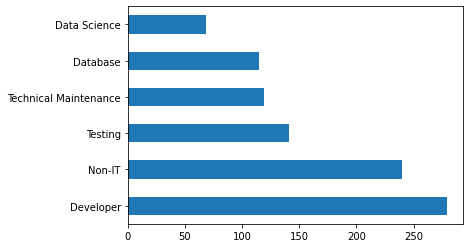

In [ ]:
df['Category'].value_counts().plot(kind='barh')

In [ ]:
df['Category'].value_counts().min()

68

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
# cleaning the data

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub('http\S+\s*',' ',text) # remove url
  text = re.sub('RT|cc',' ',text) # remove RT and cc
  text = re.sub('#\S+','',text) # remove hastags
  text = re.sub('@\S+',' ',text) # remove mentions
  text = re.sub('[@%s]' % re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"""),' ',text)
  # remove punctuations
  text = re.sub(r'[^\x00-\x7f]',r' ',text)
  text = re.sub('\s+', ' ', text)

  text = re.sub('[^a-z]',' ',text)

  text = re.sub('\.+',' ',text)
  word_token = word_tokenize(text)
  text = [words for words in word_token if words not in stops]
  text = [words for words in text if words not in string.punctuation]
  return ' '.join(text)





In [ ]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
df['Category'].value_counts()

Developer                279
Non-IT                   240
Testing                  141
Technical Maintenance    119
Database                 115
Data Science              68
Name: Category, dtype: int64

In [ ]:
df.drop('Resume',axis=1,inplace=True)

In [ ]:
Category = {'Developer':0,'Non-IT':1,'Testing':2,'Technical Maintenance':3,'Database':4,'Data Science':5 }

In [ ]:
df['Category'] = df['Category'].map(Category)

In [ ]:
df.head()

,Category,cleaned_resume
0,5,skills programming languages python pandas num...
1,5,education details may may b e uit rgpv data sc...
2,5,areas interest deep learning control system de...
3,5,skills r python sap hana tableau sap hana sql ...
4,5,education details mca ymcaust faridabad haryan...


In [ ]:
x = df.drop('Category',axis=1)

In [ ]:
x

,cleaned_resume
0,skills programming languages python pandas num...
1,education details may may b e uit rgpv data sc...
2,areas interest deep learning control system de...
3,skills r python sap hana tableau sap hana sql ...
4,education details mca ymcaust faridabad haryan...
...,...
957,computer skills proficient ms office word basi...
958,willingness ept challenges positive thinking g...
959,personal skills quick learner eagerness learn ...
960,computer skills software knowledge ms power po...


In [ ]:
y = df[['Category']]

In [ ]:
y

,Category
0,5
1,5
2,5
3,5
4,5
...,...
957,2
958,2
959,2
960,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=0.3)

In [ ]:
x_train.shape

(673, 1)

In [ ]:
x_test.shape

(289, 1)

In [ ]:
tokenizer = Tokenizer(oov_token='<unk>')

In [ ]:
tokenizer.fit_on_texts(x_train['cleaned_resume'])

In [ ]:
word_index = tokenizer.word_index

In [ ]:
len(word_index)

7120

In [ ]:
vocab_size = len(word_index)

In [ ]:
word_index

{'<unk>': 1,
 'exprience': 2,
 'company': 3,
 'project': 4,
 'months': 5,
 'description': 6,
 'details': 7,
 'data': 8,
 'management': 9,
 'team': 10,
 'system': 11,
 'maharashtra': 12,
 'database': 13,
 'year': 14,
 'testing': 15,
 'using': 16,
 'ltd': 17,
 'development': 18,
 'sql': 19,
 'business': 20,
 'client': 21,
 'java': 22,
 'skill': 23,
 'less': 24,
 'test': 25,
 'developer': 26,
 'engineering': 27,
 'january': 28,
 'application': 29,
 'work': 30,
 'c': 31,
 'pune': 32,
 'services': 33,
 'skills': 34,
 'education': 35,
 'pvt': 36,
 'software': 37,
 'server': 38,
 'sales': 39,
 'responsibilities': 40,
 'reports': 41,
 'operations': 42,
 'process': 43,
 'technologies': 44,
 'customer': 45,
 'technical': 46,
 'working': 47,
 'monthscompany': 48,
 'university': 49,
 'python': 50,
 'design': 51,
 'requirements': 52,
 'india': 53,
 'environment': 54,
 'various': 55,
 'b': 56,
 'e': 57,
 'web': 58,
 'college': 59,
 'engineer': 60,
 'quality': 61,
 'like': 62,
 'worked': 63,
 'issues

In [ ]:
x_train['cleaned_resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating review process run analytics generate

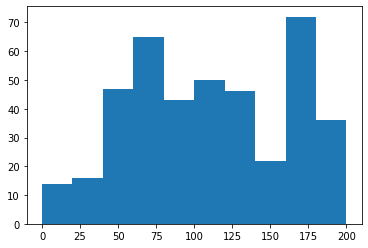

In [ ]:
plt.hist(df['cleaned_resume'].apply(lambda x : len(x.split())),range=(0,200))
plt.show()

In [ ]:
max_len = 190
embedding_dimension = 300
truncating = 'post'
padding_type = 'post'

In [ ]:
x_train_sequences = tokenizer.texts_to_sequences(x_train['cleaned_resume'])

In [ ]:
x_test_sequences = tokenizer.texts_to_sequences(x_test['cleaned_resume'])

In [ ]:
print(x_train_sequences[0])

[156, 83, 75, 346, 963, 35, 7, 28, 549, 2056, 217, 12, 217, 49, 28, 56, 549, 2056, 217, 12, 217, 49, 28, 198, 2057, 12, 168, 194, 28, 488, 31, 12, 168, 194, 28, 31, 12, 168, 194, 1094, 496, 3269, 23, 7, 96, 3643, 2, 48, 7, 3, 3270, 1094, 496, 59, 1986, 6, 91, 3269, 3270, 1094, 496, 59, 1986, 732, 4926, 107, 4927, 4928, 4929, 2056, 1741, 91, 3644, 381, 3645, 1065, 570, 66, 87, 565, 3, 6, 87, 1437, 2056, 4930, 347, 4931, 1437, 85, 223, 1173, 4932, 4933]


In [ ]:
len(x_train_sequences[0])

94

In [ ]:
word_index['pr']

994

In [ ]:
train_padded = pad_sequences(x_train_sequences,maxlen=max_len,padding=padding_type,truncating=truncating)

In [ ]:
test_padded = pad_sequences(x_test_sequences,maxlen=max_len,padding=padding_type,truncating=truncating)

In [ ]:
train_padded[0]

array([ 156,   83,   75,  346,  963,   35,    7,   28,  549, 2056,  217,
         12,  217,   49,   28,   56,  549, 2056,  217,   12,  217,   49,
         28,  198, 2057,   12,  168,  194,   28,  488,   31,   12,  168,
        194,   28,   31,   12,  168,  194, 1094,  496, 3269,   23,    7,
         96, 3643,    2,   48,    7,    3, 3270, 1094,  496,   59, 1986,
          6,   91, 3269, 3270, 1094,  496,   59, 1986,  732, 4926,  107,
       4927, 4928, 4929, 2056, 1741,   91, 3644,  381, 3645, 1065,  570,
         66,   87,  565,    3,    6,   87, 1437, 2056, 4930,  347, 4931,
       1437,   85,  223, 1173, 4932, 4933,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
rev_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
rev_word_index[994]

'pr'

In [ ]:
def decode_sentence(number):
  return ' '.join([rev_word_index.get(i,'?') for i in number])

In [ ]:
decode_sentence(train_padded[0])

'operating systems windows xp vista education details january f painting nagpur maharashtra nagpur university january b f painting nagpur maharashtra nagpur university january diploma art maharashtra state board january h c maharashtra state board january c maharashtra state board fine arts lecturer skill details ms cit exprience monthscompany details company shubhankan fine arts college indore description job lecturer shubhankan fine arts college indore nov artist completed atd bfa mfa painting searching job faculty area comfort place improve knowledge experience field company description experience classes painting rangoli drawing summer classes etc health physical disability orthopedically ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
model = KNeighborsClassifier()

In [ ]:
model.fit(train_padded,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
 y_pred = model.predict(test_padded)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.8477508650519031

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        82
           1       0.89      0.79      0.84        75
           2       0.79      0.95      0.87        44
           3       0.97      0.76      0.85        45
           4       0.92      0.88      0.90        25
           5       1.00      0.78      0.88        18

    accuracy                           0.85       289
   macro avg       0.89      0.84      0.86       289
weighted avg       0.86      0.85      0.85       289

